In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re
import string
import nltk
import warnings

In [3]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
df1.info

<bound method DataFrame.info of           id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]>

In [6]:
df1.isnull().sum()

id       0
tweet    0
dtype: int64

In [7]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31957    False
31958    False
31959    False
31960    False
31961    False
Length: 31962, dtype: bool

In [9]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
31957    False
31958    False
31959    False
31960    False
31961    False
Length: 31962, dtype: bool>

In [10]:
def remove_pattern(txt, pattern):
    r = re.findall(pattern, txt)
    for word in r:
        txt = re.sub(word, "", txt)
    return txt

In [11]:
remove_pattern('@user when a father is dysfunctional and is','@')

'user when a father is dysfunctional and is'

In [12]:
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df1['tweet'] = np.vectorize(remove_pattern)(df1['tweet'], "@[\w]*")

In [13]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [14]:
#Removing special characters, numbers and punctuations:
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")
df1['tweet'] = df1['tweet'].str.replace("[^a-zA-Z#]", " ")

C:\Users\jaiswal\AppData\Local\Temp/ipykernel_4084/229802951.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")
C:\Users\jaiswal\AppData\Local\Temp/ipykernel_4084/229802951.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['tweet'] = df1['tweet'].str.replace("[^a-zA-Z#]", " ")


In [15]:
df.tweet[0]

'  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run'

In [16]:
#Remove short English words
df['tweet'] = df['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df1['tweet'] = df1['tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [17]:
df.tweet[0]

'when father dysfunctional selfish drags kids into dysfunction #run'

In [18]:
df.head()

,id,label,tweet
0,1,0,when father dysfunctional selfish drags kids i...
1,2,0,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty
3,4,0,#model love take with time
4,5,0,factsguide society #motivation


In [19]:
token = df['tweet'].apply(lambda x: x.split())
token1 = df1['tweet'].apply(lambda x: x.split())
token.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tweet, dtype: object

In [20]:
#Stemming the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

token = token.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
token1 = token1.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
token.head()


0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tweet, dtype: object

In [21]:
#Combining words into single sentence
for i in range(len(token)):
    token[i] = " ".join(token[i])
for i in range(len(token1)):
    token1[i] = " ".join(token1[i])
    
df['tweet'] = token
df1['tweet'] = token1
df['tweet']

0        when father dysfunct selfish drag kid into dys...
1        thank #lyft credit caus they offer wheelchair ...
2                                      bihday your majesti
3                               #model love take with time
4                                 factsguid societi #motiv
                               ...                        
31957                                           that youuu
31958    nina turner airwav tri wrap herself mantl genu...
31959                         listen song monday morn work
31960          #sikh #templ vandalis #calgari #wso condemn
31961                                         thank follow
Name: tweet, Length: 31962, dtype: object

In [22]:
df.head()

,id,label,tweet
0,1,0,when father dysfunct selfish drag kid into dys...
1,2,0,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesti
3,4,0,#model love take with time
4,5,0,factsguid societi #motiv


In [23]:
df1.head()

,id,tweet
0,31963,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,#white #supremacist want everyon #bird #movi here
2,31965,safe way heal your #acn #altwaystoh #healthi #...
3,31966,curs child book reserv alreadi where when #har...
4,31967,#bihday amaz hilari #nephew ahmir uncl dave lo...


In [24]:
all_words = " ".join([sentence for sentence in df['tweet']])

In [25]:
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

In [26]:
#!pip install wordcloud


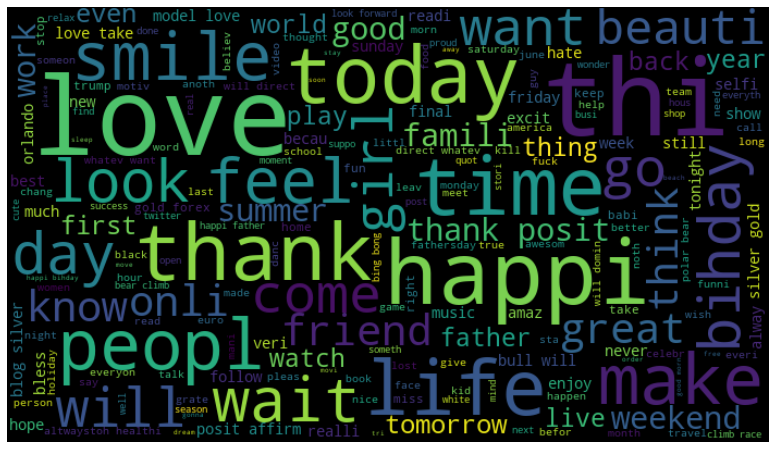

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=700, height=400, random_state=4, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

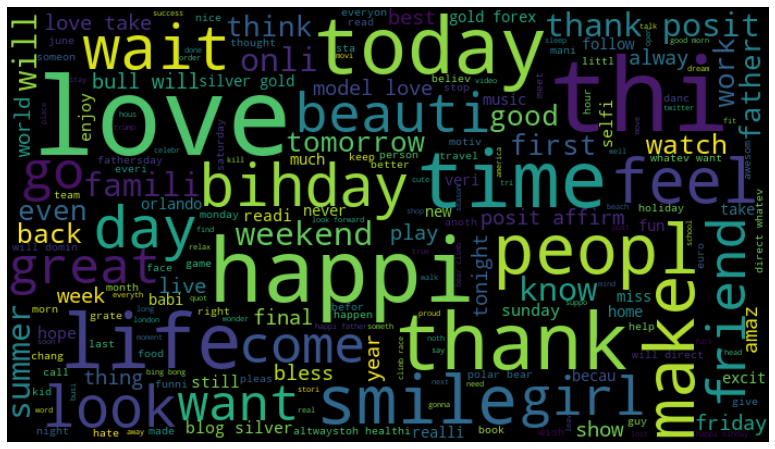

In [28]:
#Positive words visualization 
all_words = " ".join([sentence for sentence in df['tweet'][df['label']==0]])

wordcloud = WordCloud(width=700, height=400, random_state=4, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

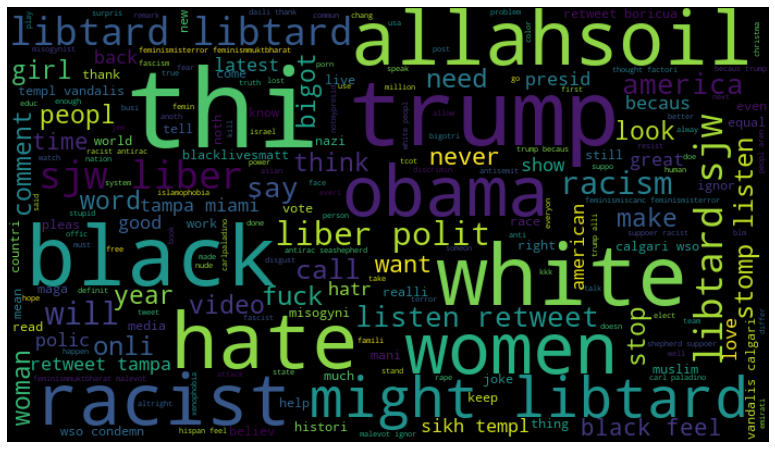

In [29]:
#Negative words visualization 
all_words = " ".join([sentence for sentence in df['tweet'][df['label']==1]])

wordcloud = WordCloud(width=700, height=400, random_state=4, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#Extracting the hashtag
def hashtag_extract(tweets):
    hashtags = []
    for i in tweets:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [31]:
#ht_positive = hashtag_extract(df['tweet'][df['label']==0])
#ht_negative = hashtag_extract(df['tweet'][df['label']==1])

In [32]:
#ht_positive

In [33]:
#ht_positive[:10]

In [34]:
#ht_positive = sum(ht_positive, [])
#ht_negative = sum(ht_negative, [])

In [35]:
#ht_positive[:10]

In [36]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

NameError: name 'ht_positive' is not defined

In [ ]:
#Selecting top 10 +ve hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

In [ ]:
#Selecting top 10 -ve hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
#bow_vectorizer = CountVectorizer(min_df = 2,max_features = 5000,stop_words='english')
#bow = bow_vectorizer.fit_transform(df['tweet'])
#bow

<31962x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 167487 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['tweet'], df['label'], random_state=42, test_size=0.25)

In [90]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
#model = LogisticRegression(solver='liblinear',multi_class='auto')
#model = LinearSVC(penalty='l2', C=0.5, dual=False, random_state=0, max_iter=1000)
#model = DecisionTreeClassifier()
#model = RandomForestClassifier(n_estimators=5)
#model.fit(x_train, y_train)
#model = RandomForestClassifier()
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
#model = MultinomialNB()
model = make_pipeline(TfidfVectorizer(max_features = 10000,smooth_idf=True),RandomForestClassifier())
model.fit(x_train, y_train)

In [180]:
pred = model.predict(x_test)
pred[:200]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [181]:
pred.shape

(7991,)

In [182]:
f1_score(y_test, pred)

0.6580086580086579

In [183]:
accuracy_score(y_test,pred)

0.960455512451508

In [184]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

C:\Users\jaiswal\AppData\Local\Temp/ipykernel_4084/3272762426.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred = pred.astype(np.int)


0.670753064798599

In [185]:
#df1

In [186]:
#df

In [187]:
bow1 = bow_vectorizer.fit_transform(df1['tweet'])
bow1

<17197x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 90730 stored elements in Compressed Sparse Row format>

In [188]:
#model.fit(bow, df['tweet'])
y_final = model.predict(df1['tweet'])
y_final[:200]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [189]:
y_final.shape

(17197,)

In [190]:
new1_df = pd.DataFrame()
new1_df

""


In [191]:
new1_df['id'] = df1['id']
new1_df['label'] = y_final
new1_df

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


In [192]:
new1_df.to_csv('submission.csv',index=False)

In [193]:
new1_df.tail()

,id,label
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
17196,49159,0


In [194]:
new1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      17197 non-null  int64
 1   label   17197 non-null  int64
dtypes: int64(2)
memory usage: 268.8 KB


In [195]:
new1_df[new1_df['label']==1].shape

(870, 2)

In [196]:
df[df['label']==1].shape

(2242, 3)